# Outliers

### Def:

        - A value which are different or act different form other value as know as outlier.

### Effect of Outliers on Ml alorithms
   

    1.Linear model
    2.ada boost
    3.Deep learning

    when calculating in machine learning then it will effect on ml weight mean cofficeint of line Ax+Bx +C = 0     A,B,C

    - Does not effect on trees and forest based alogrithm

## How to Treat Outliers ?

#### There are four Method

    1.Trimming:means remove it 
    2.capping :means make boundry less value to less outliers and high value high outliers
    3.Treat as missing value
    4.Discritisation

### How to Find Outliers

    1.Normal Distribution : when value is outside the range(mean+(3*meu)) and mean-(3*meu)) Z-Score
    2.Skewed Distribution : boxplot (IQR)
    3.other Distribution  : when value is outside the range(2.5% percentile and 97.5 percentile) (Percentile
    

    1.Z-Score
    2.IQR based filling 
    3.Percentile
    4.winsarzation


## 1.Z-Score

    We used z-score when data is normal distribution or similar to normal distribution
    As we know that
        - (mean+meu and mean-meu ) 68% percent data 
        - (mean+2*meu and mean-2*meu) 95%
        - (mean+3*meu and mean-3*meu) 99.7%
        - if lie outside that range that it consider is outliers

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [47]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: xlabel='placement_exam_marks', ylabel='Count'>

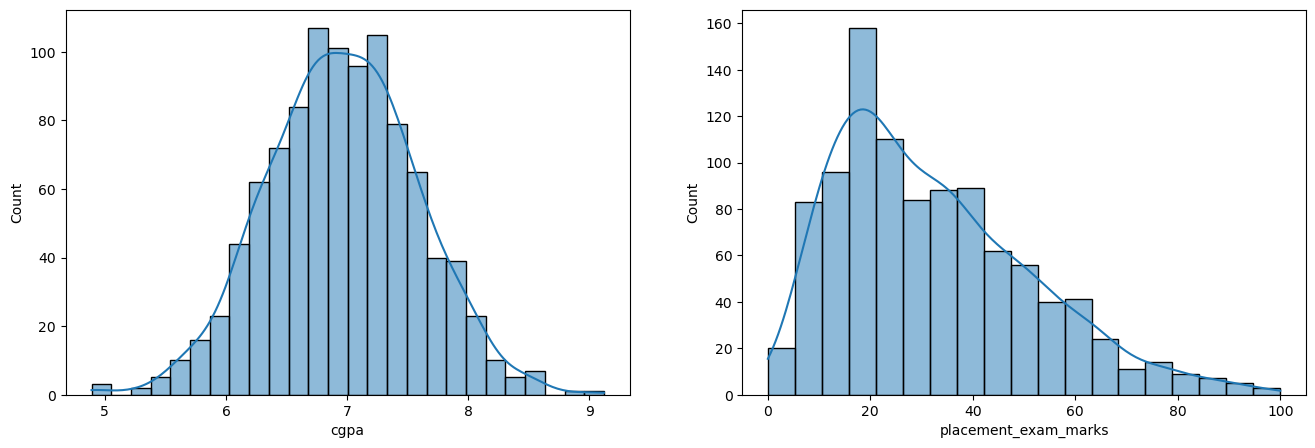

In [48]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)

sns.histplot(df['cgpa'],kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'],kde=True)

#### So from the given graphs we conclude that we only apply z-score to cgpa bcz its normaly distributed

In [49]:
print("mean of cgpa",df['cgpa'].mean())
print("std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("max value of cgpa",df['cgpa'].max())

mean of cgpa 6.96124
std value of cgpa 0.6158978751323894
Min value of cgpa 4.89
max value of cgpa 9.12


In [50]:
print("Boundry Range of Cgpa")
print("lowest value ",df['cgpa'].mean() - (3*df['cgpa'].std()))
print("highest value ",df['cgpa'].mean() + (3*df['cgpa'].std()))

Boundry Range of Cgpa
lowest value  5.113546374602832
highest value  8.808933625397168


In [51]:
# Finding outliers

df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### Trimming

In [52]:
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)] # delete outliers rows 
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


### Capping

In [53]:
upper_limit= df['cgpa'].mean() + (3*df['cgpa'].std())
lower_limit=df['cgpa'].mean() - (3*df['cgpa'].std())

In [54]:
df['cgpa']=np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa'])
)

# where is function where(x,y,z) x is condition if condition than y if false than z

In [55]:
df.shape

(1000, 3)

In [56]:
df.describe

<bound method NDFrame.describe of          cgpa  placement_exam_marks  placed
0    7.190000                  26.0       1
1    7.460000                  38.0       1
2    7.540000                  40.0       1
3    6.420000                   8.0       1
4    7.230000                  17.0       0
..        ...                   ...     ...
995  8.808934                  44.0       1
996  8.808934                  65.0       1
997  5.113546                  34.0       0
998  8.620000                  46.0       1
999  5.113546                  10.0       1

[1000 rows x 3 columns]>

## 2.IQR

    if value outside of range (min and max) where min = (Q1 -1.5*IQR) and max = Q3 + 1.5*IQR  so Q1 is 25th percentile , Q3 is 75th perecentile and IQR = (Q3-Q1)

In [57]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: xlabel='placement_exam_marks', ylabel='Count'>

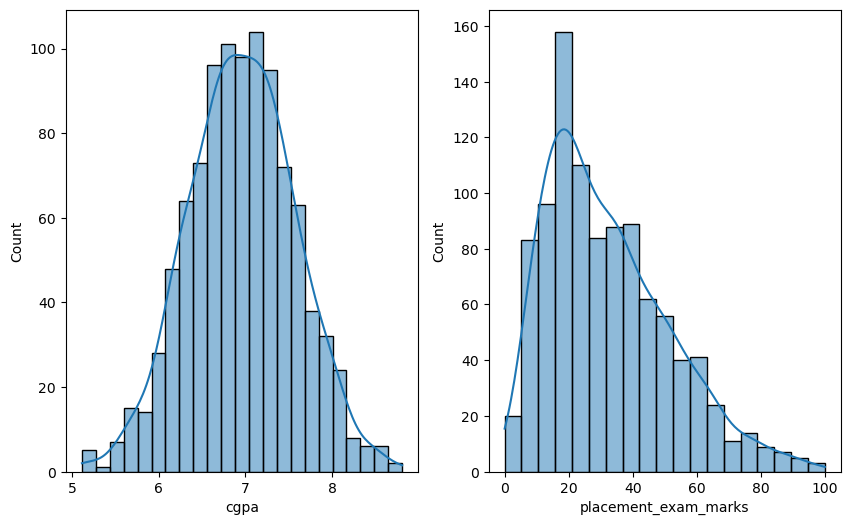

In [58]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'],kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'],kde=True)

### Note: 
    -As we can see placement column has right skew distribution there for we will use IQR method (Box-plot)

In [59]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [60]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

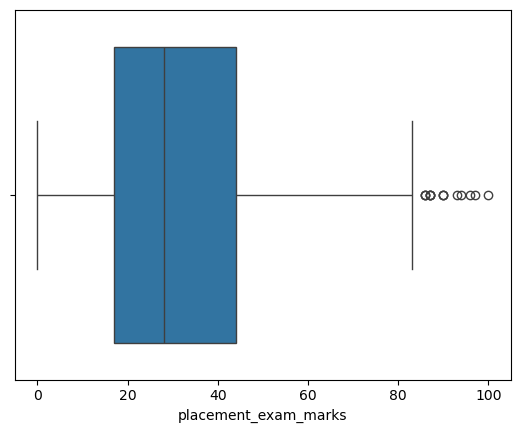

In [61]:
sns.boxplot(x=df['placement_exam_marks'])

In [62]:
# finding iqr

perecentile25 = df['placement_exam_marks'].quantile(0.25)
perecentile75 = df['placement_exam_marks'].quantile(0.75)

In [63]:
iqr = perecentile75 - perecentile25

In [64]:
upper_limit = perecentile75 + iqr

In [65]:
lower_limit = perecentile25 - iqr

### Finding outliers

In [67]:


df[(df['placement_exam_marks']>upper_limit) | (df['placement_exam_marks'] < lower_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
98,8.12,76.0,0
114,6.30,77.0,1
134,6.33,93.0,0
157,7.07,81.0,1
162,7.80,90.0,0
182,6.87,76.0,0
222,6.97,78.0,0


### triming

In [68]:
new_df_timer = df[(df['placement_exam_marks']<upper_limit) & (df['placement_exam_marks'] > lower_limit)]

###  Capping

In [70]:
new_df_cp = df.copy()
new_df_cp['placement_exam_marks'] = np.where(
    new_df_cp['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cp['placement_exam_marks']<lower_limit,
        lower_limit,
        new_df_cp['placement_exam_marks']
    )
)

In [71]:
new_df_cp.shape

(1000, 3)

## Percentile

so in this we make some range of percentile like 2.5% and 97.5% when outside we apply percentile